In [18]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

# Minimizers
## Bucket distribution

In [3]:
file_prefix = '~/others_projects/pufferfish/build/'

In [4]:
def load(file_prefix, typ):
    df = {}
    maxRow = pd.DataFrame(columns=['minimizer', 'unitigCnt', 'kmerCnt', 'posBits', 'perc'] )

    for i in range(2,13):
        df[i] = pd.read_csv(file_prefix+typ+'-bucket-'+str(i)+'.dist', sep=",", header=None, names=['bucket','unitigCnt', 'kmerCnt', 'posBits'])
        df[i] = df[i].sort_values(['posBits', 'kmerCnt'], ascending=[0,0])
        sumCnt = df[i]['kmerCnt'].sum()
        df[i]['perc'] = round(df[i]['kmerCnt']*100/sumCnt, 2)
        df[i]['minimizer'] = i
        maxRow = maxRow.append(df[i][['minimizer', 'unitigCnt', 'kmerCnt', 'posBits', 'perc']][0:2], ignore_index=True)
    return df, maxRow

# Human Transcriptome

In [5]:
txp_df, txp_maxRow = load(file_prefix, 'txp')

In [6]:
txp_maxRow

,minimizer,unitigCnt,kmerCnt,posBits,perc
0,2,1555891,75413938,27,95.06
1,2,301440,2820982,22,3.56
2,3,1379399,28673310,25,36.14
3,3,1160418,26868589,25,33.87
4,4,491301,9085562,24,11.45
5,4,469396,8706200,24,10.97
6,5,304838,5442478,23,6.86
7,5,312752,5367546,23,6.77
8,6,227908,3521569,22,4.44
9,6,215885,3247723,22,4.09


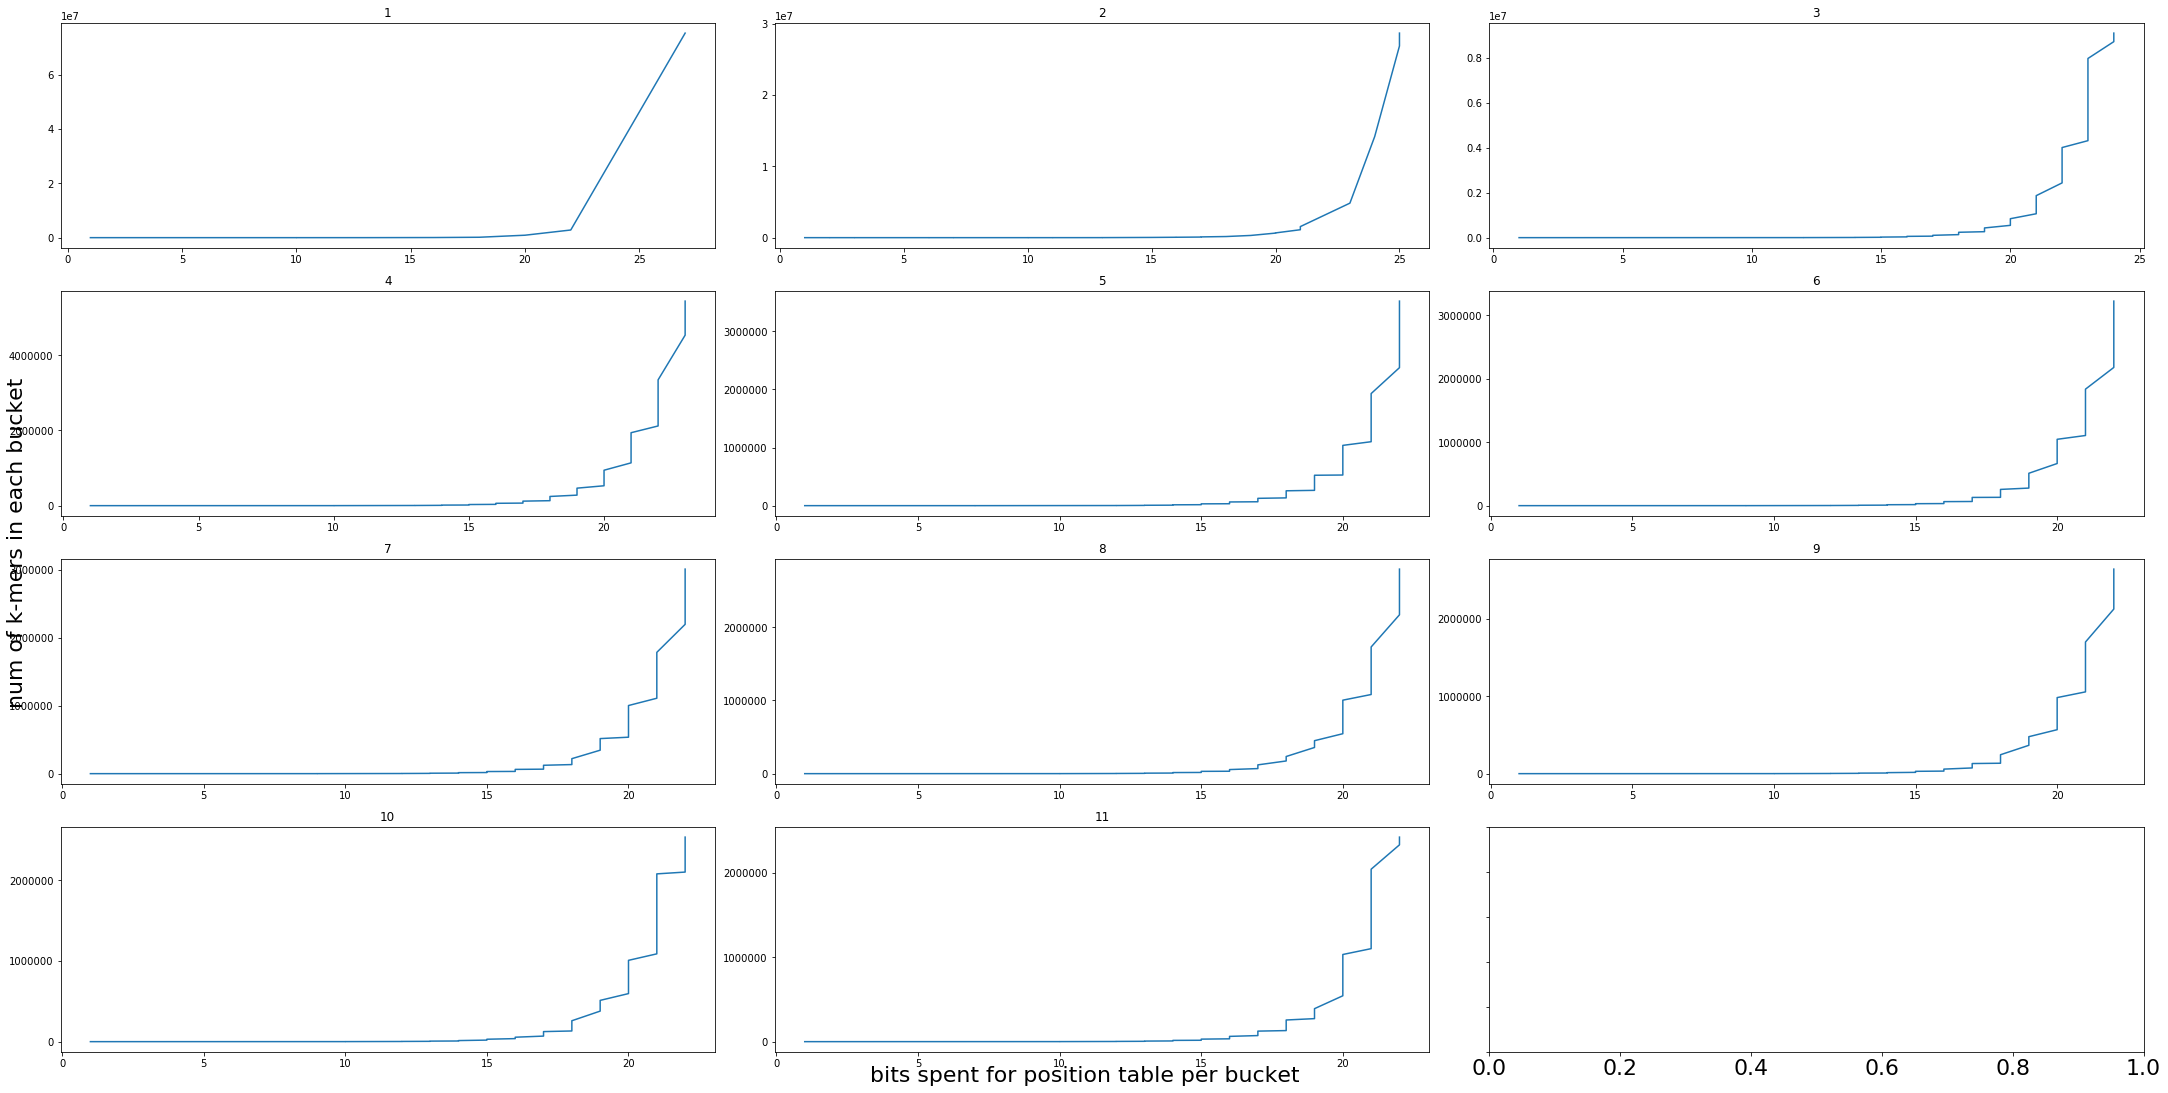

In [27]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(30, 15), )
fig.text(0.5, 0.001, 'bits spent for position table per bucket', ha='center')
fig.text(0.001, 0.5, 'num of k-mers in each bucket', va='center', rotation='vertical')
plt.rcParams.update({'font.size': 10})
for i in range(1,12):
    plt.subplot(4,3,i)
    plt.plot(txp_df[i+1].posBits, txp_df[i+1].kmerCnt)
    plt.title(i)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams.update({'font.size': 22})

# Human Genome

In [9]:
gen_df, gen_maxRow = load(file_prefix, 'gen')

In [10]:
gen_maxRow

,minimizer,unitigCnt,kmerCnt,posBits,perc
0,2,70766018,2474299919,32,93.29
1,2,12922318,121054422,27,4.56
2,3,55029532,1180275975,31,44.50
3,3,49766929,841113965,30,31.71
4,4,18850678,322222622,29,12.15
5,4,13831047,241035881,28,9.09
6,5,15958184,281274039,29,10.61
7,5,12675830,187700826,28,7.08
8,6,9763184,130423717,27,4.92
9,6,6780516,97948201,27,3.69


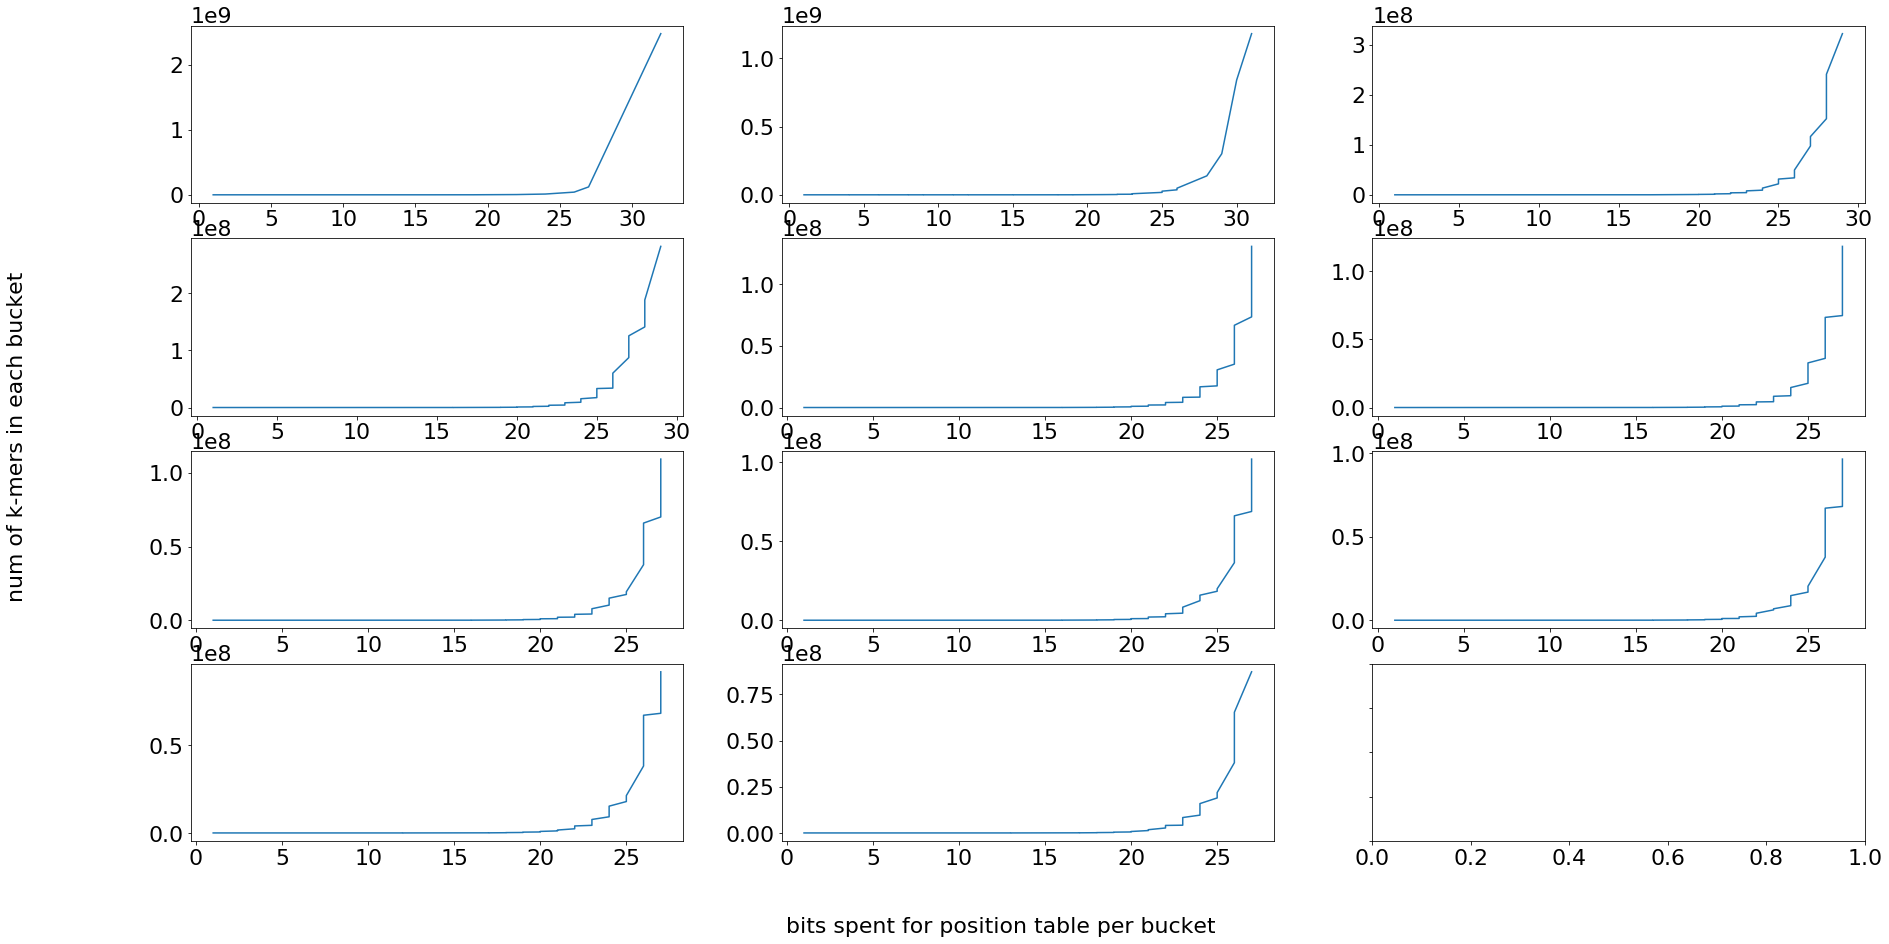

In [19]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(30, 15))
fig.text(0.5, 0.04, 'bits spent for position table per bucket', ha='center')
fig.text(0.04, 0.5, 'num of k-mers in each bucket', va='center', rotation='vertical')

for i in range(1,12):
    plt.subplot(4,3,i)
    plt.plot(gen_df[i+1].posBits, gen_df[i+1].kmerCnt)
#plt.xlab("bits spent for position table per bucket")
#plt.ylab("num of k-mers in each bucket")